In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [ ]:
#..............................................................................................read data

In [4]:
df = pd.read_csv('Pokemon.csv', index_col=0)

In [15]:
df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp_Def,Speed,Stage,Legendary
0,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [113]:
df.dtypes

Name         object
Type_1       object
Type_2       object
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp_Def        int64
Speed         int64
Stage         int64
Legendary      bool
dtype: object

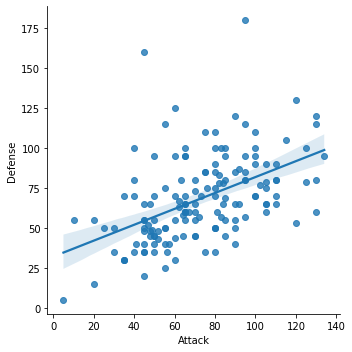

In [18]:
#....................................................................................scatter plot (Q to Q)

sns.lmplot(data=df,x='Attack',y='Defense')

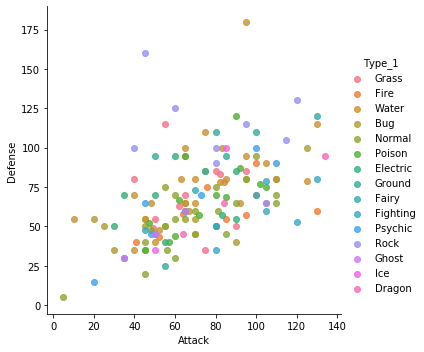

In [20]:
sns.lmplot(data=df,x='Attack',y='Defense',hue='Type_1',fit_reg=False)

(0, 141.9881096001028)

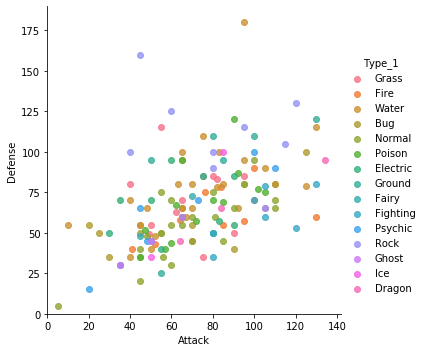

In [21]:
sns.lmplot(data=df,x='Attack',y='Defense',hue='Type_1',fit_reg=False)


# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

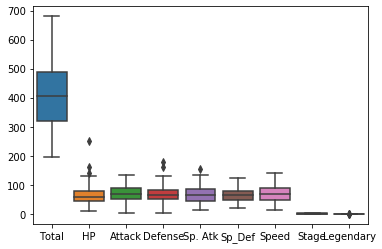

In [22]:
#............................................................................side by side box plot (C to Q)
sns.boxplot(data=df)

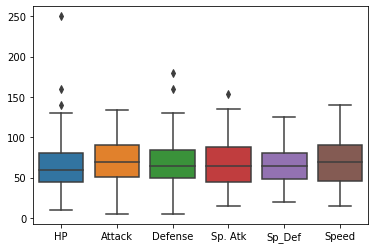

In [29]:
proper_df=df.drop(['Total','Stage','Legendary'],axis=1)
sns.boxplot(data=proper_df)

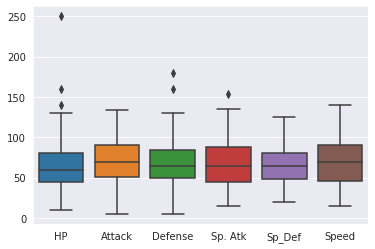

In [62]:
# Set theme
sns.set_style('darkgrid')
sns.boxplot(data=proper_df)

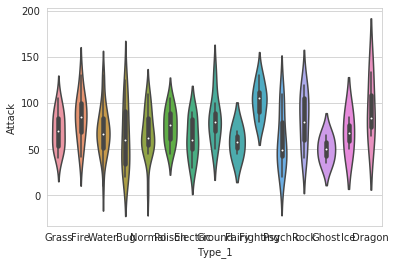

In [95]:
#.............................................................................violin plot type of s by s box plot

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type_1', y='Attack', data=df)

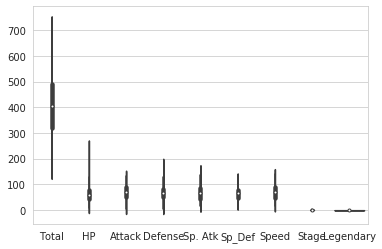

In [34]:
sns.violinplot(data=df)

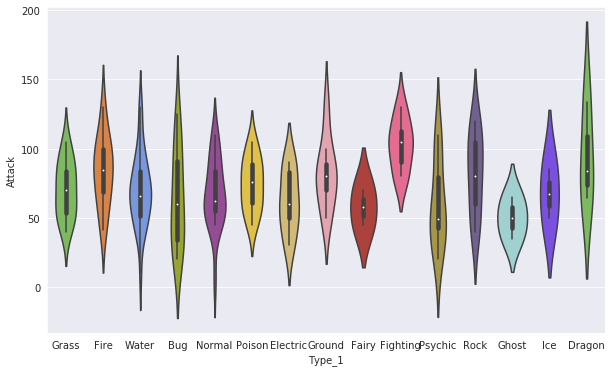

In [63]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

#color list
pkmn_type_colors = ['#78C850',
                    '#F08030',
                    '#6890F0',  
                    '#A8B820',      
                    '#A040A0',   
                    '#F8D030',  
                    '#E0C068',  
                    '#EE99AC',   
                    '#C03028',   
                    '#F85888', 
                    '#B8A038',   
                    '#705898',  
                    '#98D8D8', 
                    '#7038F8',   
                   ]

#code
sns.violinplot(x='Type_1', y='Attack', data=df, 
               palette=pkmn_type_colors)

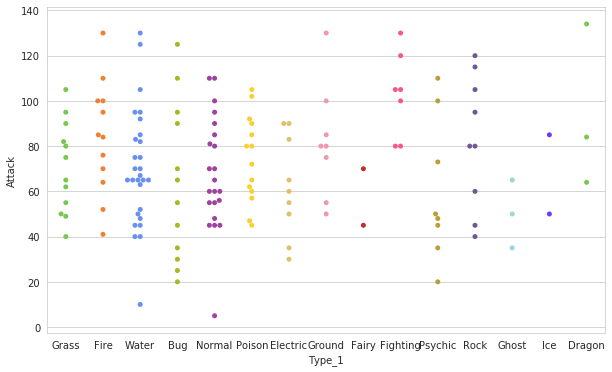

In [96]:
#.............................................................................swarmplots type of s by s box plot

# Set figure size with matplotlib
plt.figure(figsize=(10,6))

#code
sns.swarmplot(x='Type_1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

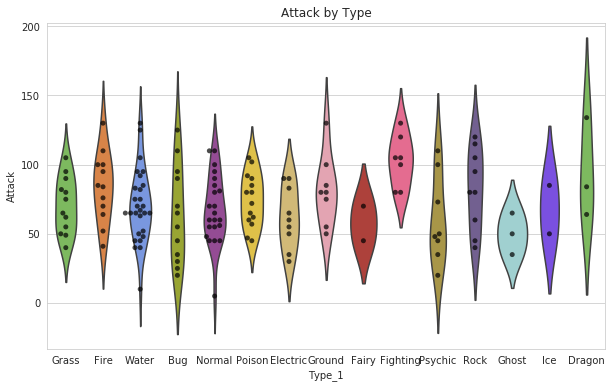

In [51]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type_1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type_1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent dots
 
# Set title with matplotlib
plt.title('Attack by Type')

In [68]:
#.................................................................................some data wrangling
#original data
proper_df

,Name,Type_1,Type_2,HP,Attack,Defense,Sp. Atk,Sp_Def,Speed
0,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,41,64,45,50,50,50
148,Dragonair,Dragon,NaN,61,84,65,70,70,70
149,Dragonite,Dragon,Flying,91,134,95,100,100,80


In [69]:
# Melted DataFrame
melted_df = pd.melt(proper_df, 
                    id_vars=["Name", "Type_1", "Type_2"], # Variables to keep
                    var_name="melted_col") # Name of melted variable
melted_df

,Name,Type_1,Type_2,melted_col,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
...,...,...,...,...,...
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130


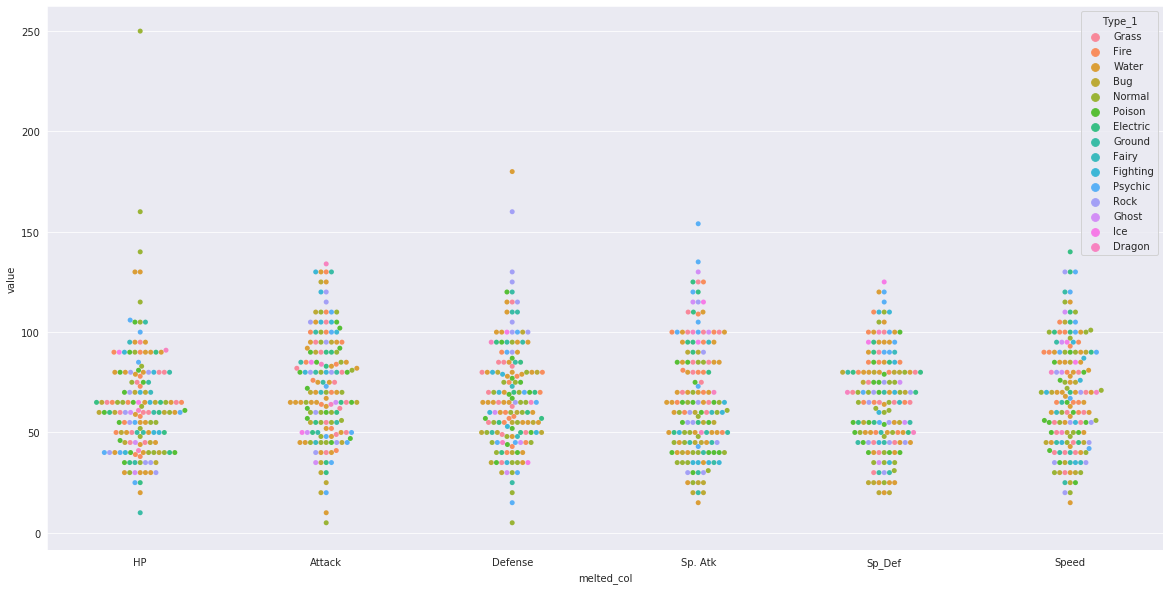

In [75]:
#figsize
plt.figure(figsize=(20,10))
 

# Swarmplot with melted_df
sns.swarmplot(x='melted_col', y='value', data=melted_df, 
              hue='Type_1')


In [76]:
proper_df

,Name,Type_1,Type_2,HP,Attack,Defense,Sp. Atk,Sp_Def,Speed
0,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,41,64,45,50,50,50
148,Dragonair,Dragon,NaN,61,84,65,70,70,70
149,Dragonite,Dragon,Flying,91,134,95,100,100,80


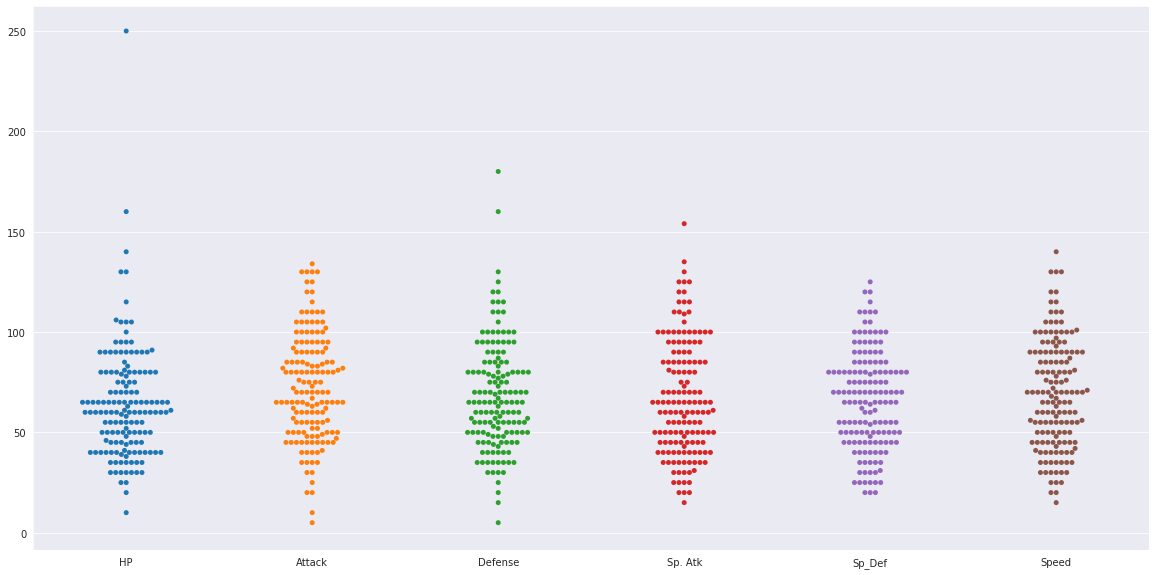

In [81]:
#figsize
plt.figure(figsize=(20,10))

#swarmplot with normal proper data
sns.swarmplot(data=proper_df)

In [83]:
# If hue of any column is needed then melt the dataset
# then plotting columns/values comes in two columns and hue column remains seperate
# thus hue can be used of seperate column which was left

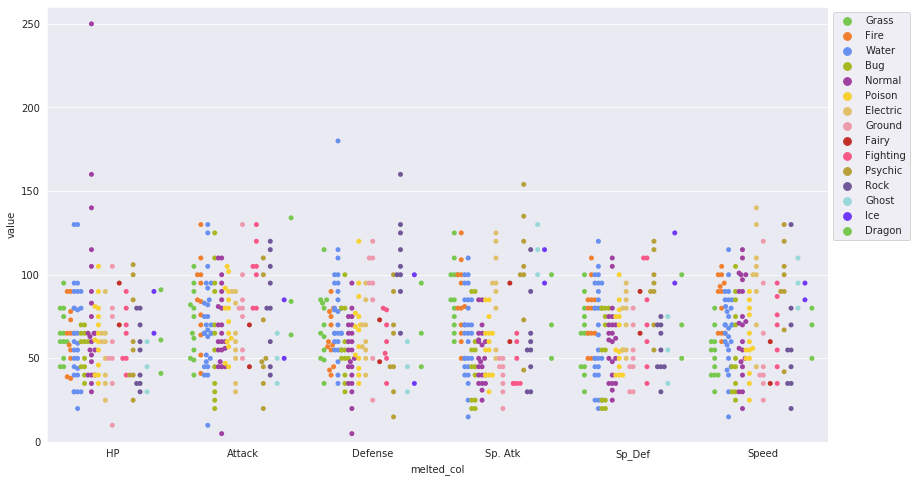

In [90]:
# Enlarge the plot
plt.figure(figsize=(14,8))
 
# plot    
sns.swarmplot(x='melted_col', 
              y='value', 
              data=melted_df, 
              hue='Type_1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

 

In [97]:
#...............................................................................Heatmap for any contingency table
proper_df.corr()


,HP,Attack,Defense,Sp. Atk,Sp_Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp_Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


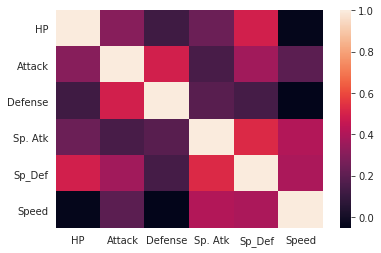

In [94]:
x=proper_df.corr()
sns.heatmap(x)

In [98]:
#.................................................................................................histogram

Text(0.5, 1.0, 'Hist')

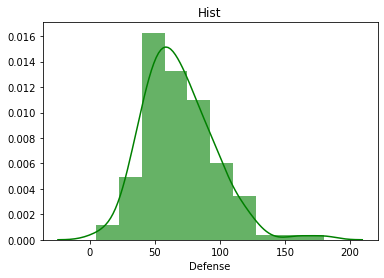

In [8]:
sns.distplot(df.Defense,color='g', bins=10, hist_kws={'alpha': 0.6})
plt.title('Hist')

In [101]:
#............................................................................................bar plot for counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

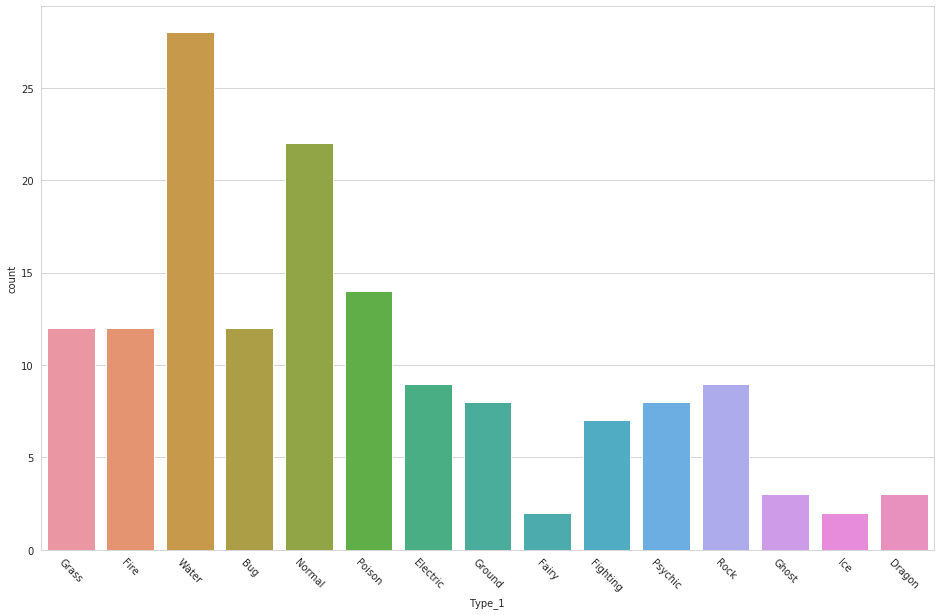

In [107]:
#figsize
plt.figure(figsize=(16,10))

# plot
sns.countplot(df.Type_1)

# some style
plt.xticks(rotation=-45)

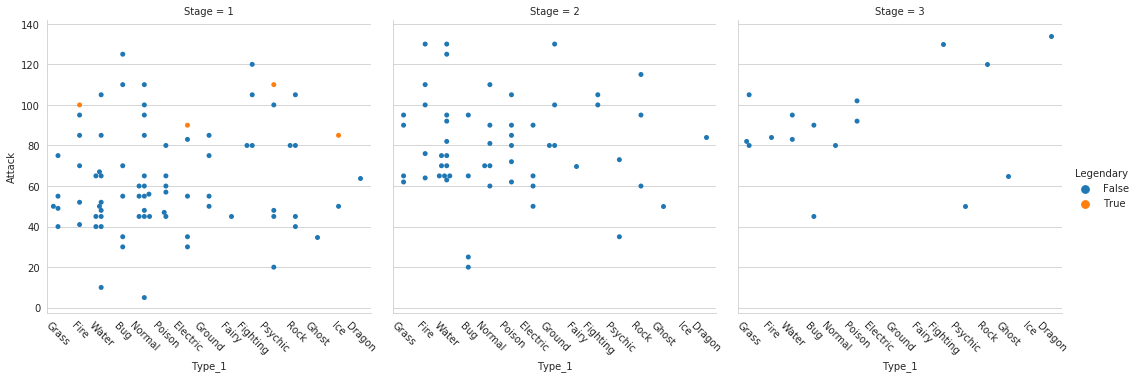

In [145]:
# Factor Plot
g = sns.catplot(   x='Type_1', 
                   y='Attack', 
                   data=df, 
                   hue='Legendary',  # Colors seperation by
                   col='Stage',  # plots seperation by
                   kind='swarm') # type of plot we need like swarn,bar,violin
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 

In [121]:
#.................................................................................................. Density Plot

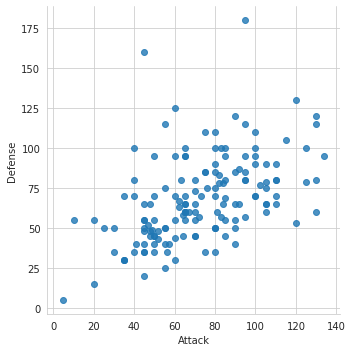

In [128]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False)

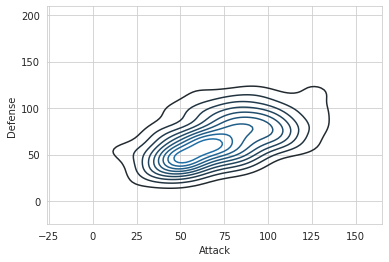

In [122]:
sns.kdeplot(df.Attack, df.Defense)

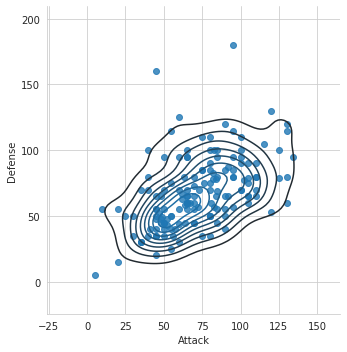

In [129]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False)
sns.kdeplot(df.Attack, df.Defense)

In [130]:
#..........................................................................................Joint Distribution Plot
 

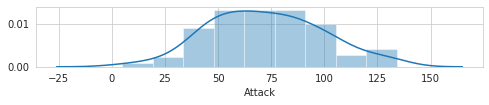

In [144]:
plt.figure(figsize=(8,1.1))
sns.distplot(df.Attack)

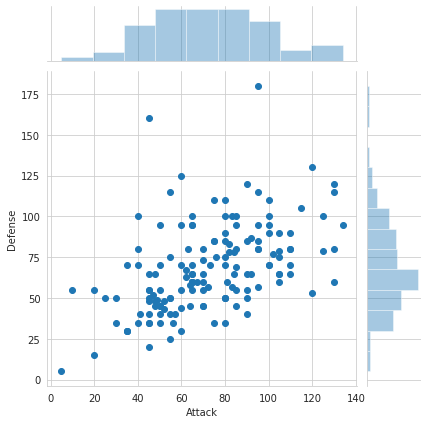

In [131]:
sns.jointplot(x='Attack', y='Defense', data=df)